<a href="https://colab.research.google.com/github/xhaktmchl/SAI_2020-2_keras_study/blob/main/SAI_keras_3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.5 뉴스 기사 분류: 다중 분류 문제

###로이터 데이터셋
: 짧은 기사나 토픽들의 데이터셋

In [ ]:
from tensorflow import keras
keras.__version__

'2.4.0'

로이터 데이터셋을 불러들인다.

In [ ]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#num_words=10000 매개변수는 데이터에서 가장 자주 등장하는 단어 10,000개로 제한


2113536/2110848 [==============================] - 0s 0us/step



 이제 데이터의 기본 정보 확인한다

In [ ]:
len(train_data) # 훈련데이터 8982개

8982

In [ ]:
len(test_data) # 테스트 데이터 2246개

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

정수형 데이터 확인

In [ ]:
train_labels[2]

3

### 데이터 전처리


전처리 방법1
:리스트를 정수 텐서로 변환

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #0으로 초기화
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

전처리 방법 2: 원-핫 이코딩 내장함수 이용

In [ ]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


# 모델 정의
Dense층은 이전층의 정보만 제공->누락된 정보활용 못함-> 정보의 병목이 될 수 있음->적은 정보가지고 46개 층을 구분하기는 힘듦

이런 이유로  큰 층을 사용 = 64개의 유닛


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


* 마지막 Dense 층의 크기만 46 => 46개로 출력
* 마지막 층에 softmax 활성화 함수가 사용되었습니다. MNIST 예제에서 이런 방식을 보았습니다. 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력합니다. 즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률입니다. 46개의 값을 모두 더하면 1이 됩니다.


손실 함수는 categorical_crossentropy = 두 확률 분포의 사이의 거리를 측정 네트워크가 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리.   
-> 두 분포 사이의 거리를 최소화하도록 훈련

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 훈련 검증(fit으로 반복)
훈련 데이터에서 1,000개의 샘플을 따로 떼어서 검증 세트로 사용:

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# 20번의 에포크로 모델을 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 57ms/step - loss: 2.5356 - accuracy: 0.5262 - val_loss: 1.6849 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3978 - accuracy: 0.7060 - val_loss: 1.2842 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 1s 42ms/step - loss: 1.0381 - accuracy: 0.7749 - val_loss: 1.1246 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8125 - accuracy: 0.8277 - val_loss: 1.0124 - val_accuracy: 0.7970
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6483 - accuracy: 0.8637 - val_loss: 0.9585 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5192 - accuracy: 0.8882 - val_loss: 0.9036 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4163 - accuracy: 0.9133 - val_loss: 0.8826 - val_accuracy: 0.8190
Epoch 8/20
16

###손실과 정확도 시각화

In [ ]:
import matplotlib.pyplot as plt

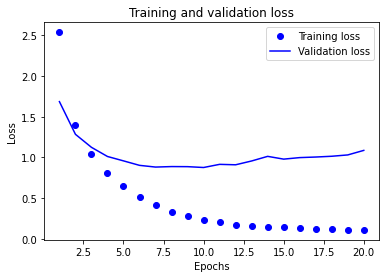

In [ ]:
# 손실함수 시각화
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

훈련 데이터에서는 손실이 이상적으로 줄지만  
실제 값에서는 손실이 어느지점부터 증가함   
=> 오버피팅

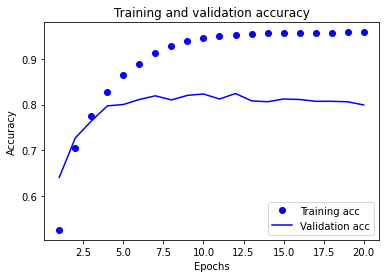

In [ ]:
# 정확도 함수 시각화
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


정확도가 어느지점 이후로 떨어짐 => 오버피팅으로 추측

문제 해결: 모델이 오버피팅 되기 전까지(9에포크 까지만 따로 훈련시킴)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 2.6236 - accuracy: 0.4425 - val_loss: 1.7162 - val_accuracy: 0.6230
Epoch 2/9
16/16 [==============================] - 1s 42ms/step - loss: 1.4089 - accuracy: 0.7063 - val_loss: 1.2802 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0343 - accuracy: 0.7769 - val_loss: 1.1085 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8120 - accuracy: 0.8252 - val_loss: 0.9994 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6503 - accuracy: 0.8619 - val_loss: 0.9349 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5208 - accuracy: 0.8921 - val_loss: 0.9285 - val_accuracy: 0.7880
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4202 - accuracy: 0.9119 - val_loss: 0.8745 - val_accuracy: 0.8090
Epoch 8/9
16/16 [===

In [ ]:
results

[0.9797959923744202, 0.7831701040267944]

정확도가 약 78% 정도 나온다.


# 정리


* N개의 클래스로 데이터 포인트를 분류하려면 네트워크의 마지막 Dense 층의 크기는 N.
* 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용.
* 이런 문제에는 항상 범주형 크로스엔트로피를 사용. 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화 함.
* 다중 분류에서 레이블을 다루는 두 가지 방법이 있습니다.
 - 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고,  categorical_crossentropy 손실 함수를 사용.
 - 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용.
* 많은 수의 범주를 분류할 때 중간층의 크기가 출력층보다 너무 작아 네트워크에 정보의 병목이 생기지 않도록 해야 한다.